In [2]:
## roc curve and auc 
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from  matplotlib import pyplot

In [3]:
#generate 2 class dataset 
X,y=make_classification(n_samples=1000,n_classes=2,random_state=1)

In [4]:
# split in train and test 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [5]:
# Created a dummy model with default 0 as output
dummy_model_prob=[0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [6]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [7]:
#prediction based on probability
model_prob=model.predict_proba(X_test)

In [9]:
#Focouse on positive outcome
model_prob=model_prob[:,1]

In [10]:
model_prob

array([9.18356320e-01, 8.86585012e-01, 2.31162898e-02, 9.81926179e-01,
       9.54554986e-01, 7.96649547e-01, 6.82332634e-03, 5.39799703e-02,
       9.91321393e-01, 4.08559511e-01, 1.49103945e-02, 9.17126585e-01,
       8.62278490e-01, 9.94790079e-01, 3.98920904e-02, 4.93193096e-02,
       9.78953701e-01, 1.69857077e-01, 3.71326061e-02, 9.67817817e-01,
       3.91218916e-03, 8.85920971e-01, 8.19802513e-01, 5.69445881e-01,
       5.88259352e-01, 9.73180873e-01, 9.66028114e-01, 2.73795975e-03,
       8.01684721e-01, 1.38977829e-01, 3.51872564e-02, 2.84734466e-01,
       8.10600420e-01, 1.02093246e-01, 9.00992099e-01, 1.04666641e-01,
       6.87496368e-03, 9.69086090e-02, 3.08852522e-02, 7.44045699e-01,
       5.29457861e-02, 1.44860827e-02, 4.46920501e-01, 6.61932009e-01,
       9.42036703e-01, 9.99410789e-01, 9.66060639e-01, 3.60436058e-01,
       1.43358845e-01, 1.42498646e-01, 5.18856956e-01, 6.34757718e-02,
       9.15656642e-01, 8.15795432e-01, 6.17692223e-01, 7.85113485e-02,
      

In [11]:
# calculate roc auc score 
dummy_model_auc=roc_auc_score(y_test,dummy_model_prob)
model_auc=roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.907648


![alt text](download.png)

![alt text](download2.png)

In [17]:
# calculate ROC Curves
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

In [19]:
thresholds

array([1.99941079e+00, 9.99410789e-01, 9.48821704e-01, 9.45822838e-01,
       9.35475968e-01, 9.33992424e-01, 9.28149306e-01, 9.26128400e-01,
       9.09612674e-01, 9.01641419e-01, 8.98006100e-01, 8.87888976e-01,
       8.55067260e-01, 8.50088690e-01, 8.45815476e-01, 8.32456357e-01,
       8.19802513e-01, 8.15795432e-01, 8.07773360e-01, 8.01684721e-01,
       7.72666184e-01, 7.71984305e-01, 7.18090773e-01, 7.16353949e-01,
       6.61932009e-01, 6.29054005e-01, 6.17692223e-01, 6.09937071e-01,
       5.95782185e-01, 5.88259352e-01, 5.69445881e-01, 5.42763147e-01,
       5.28902010e-01, 5.13580364e-01, 5.10710770e-01, 4.87563605e-01,
       4.84614874e-01, 4.55642609e-01, 4.46920501e-01, 4.25852373e-01,
       3.64309105e-01, 3.56487638e-01, 3.45966312e-01, 3.07821013e-01,
       3.00875411e-01, 2.85434309e-01, 2.84734466e-01, 2.18608803e-01,
       1.96799778e-01, 1.34064894e-01, 1.33282726e-01, 1.30277048e-01,
       1.26943039e-01, 1.04666641e-01, 1.04124073e-01, 7.03330148e-02,
      

In [18]:
model_fpr ,model_tpr

(array([0.   , 0.   , 0.   , 0.008, 0.008, 0.016, 0.016, 0.024, 0.024,
        0.032, 0.032, 0.048, 0.048, 0.056, 0.056, 0.072, 0.072, 0.08 ,
        0.08 , 0.088, 0.088, 0.096, 0.096, 0.104, 0.104, 0.112, 0.112,
        0.128, 0.128, 0.136, 0.136, 0.144, 0.144, 0.16 , 0.16 , 0.184,
        0.184, 0.2  , 0.2  , 0.208, 0.208, 0.224, 0.224, 0.24 , 0.24 ,
        0.256, 0.256, 0.296, 0.296, 0.392, 0.392, 0.4  , 0.4  , 0.448,
        0.448, 0.528, 0.528, 0.56 , 0.56 , 0.624, 0.624, 0.952, 0.952,
        1.   ]),
 array([0.   , 0.008, 0.288, 0.288, 0.368, 0.368, 0.376, 0.376, 0.424,
        0.424, 0.44 , 0.44 , 0.528, 0.528, 0.552, 0.552, 0.608, 0.608,
        0.64 , 0.64 , 0.664, 0.664, 0.704, 0.704, 0.752, 0.752, 0.784,
        0.784, 0.792, 0.792, 0.808, 0.808, 0.824, 0.824, 0.832, 0.832,
        0.84 , 0.84 , 0.848, 0.848, 0.904, 0.904, 0.912, 0.912, 0.92 ,
        0.92 , 0.928, 0.928, 0.944, 0.944, 0.952, 0.952, 0.96 , 0.96 ,
        0.968, 0.968, 0.976, 0.976, 0.984, 0.984, 0.992, 0.9

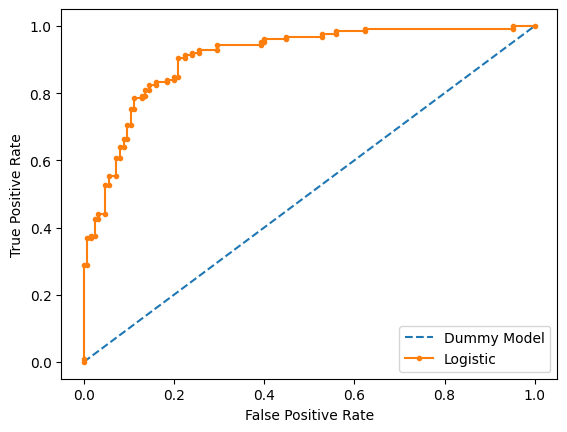

In [16]:
# plot the roc curve for the model
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
pyplot.plot(model_fpr, model_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

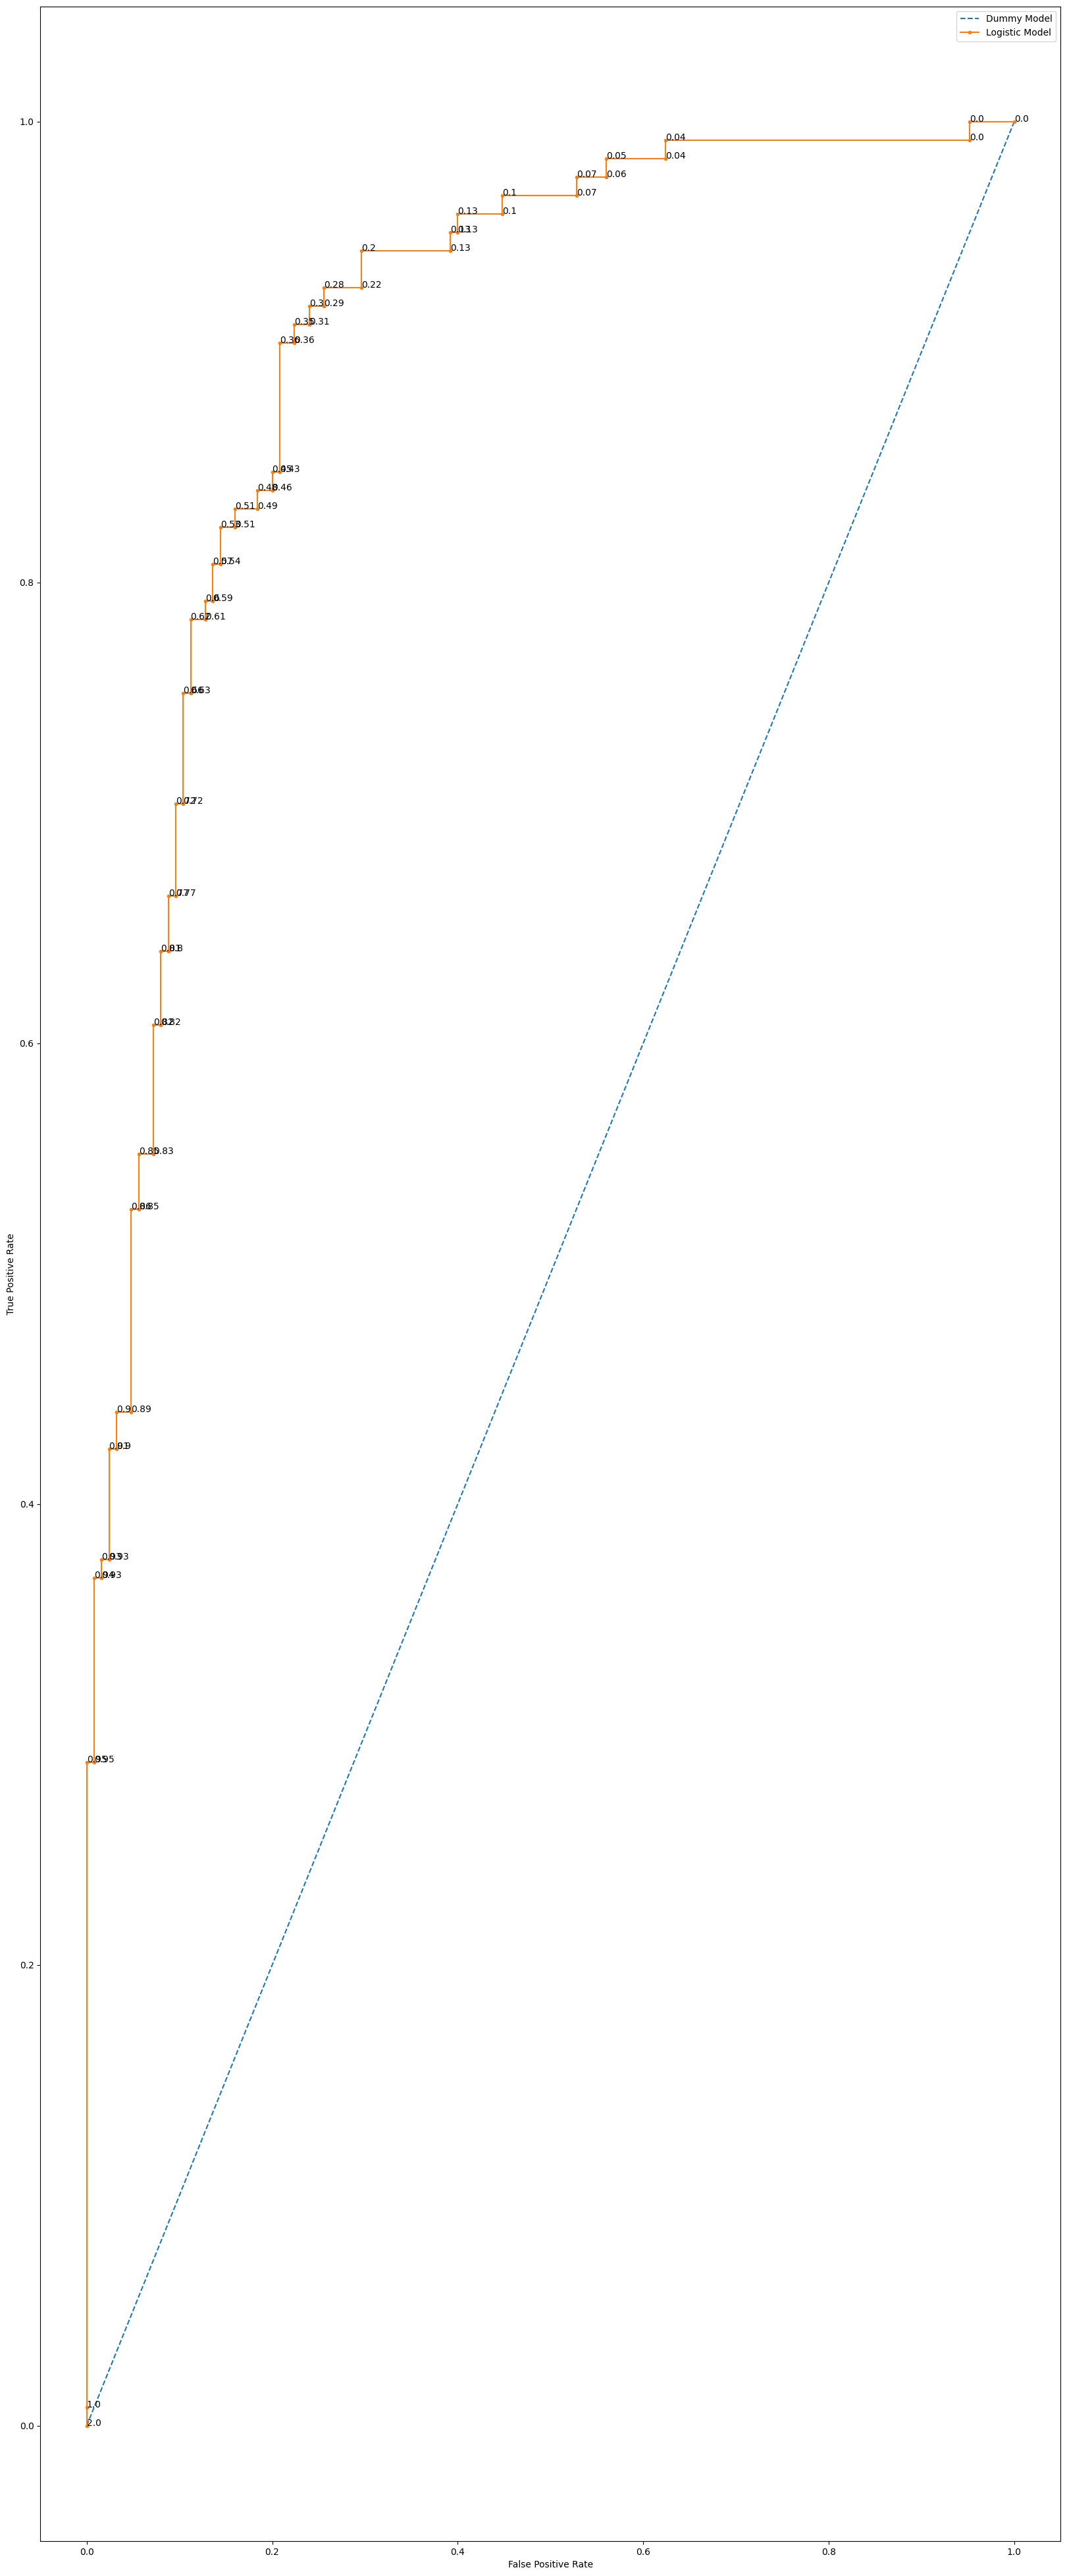

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have these variables defined:
# dummy_fpr, dummy_tpr, model_fpr, model_tpr, thresholds

fig, ax = plt.subplots(figsize=(20,50))

# Plotting the ROC curves
ax.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
ax.plot(model_fpr, model_tpr, marker='.', label='Logistic Model')

# Annotating the thresholds
for xyz in zip(model_fpr, model_tpr,thresholds):   
    ax.annotate('%s' % np.round(xyz[2],2), xy=(xyz[0],xyz[1]))
# Axis labels
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

# Show the legend
ax.legend()

# Show the plot
plt.show()
